In [208]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from scipy.optimize import lsq_linear
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from subprocess import call
from sklearn.metrics import mean_squared_error
from PIL import Image
import csv
import math

In [276]:
rango = range(10,40,2)
rango

[10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]

In [277]:
img_file = Image.open("../../imgs_TC/tomo2.png")
img_file
width, height = img_file.size
new_size = min(width, height)
format = img_file.format
mode = img_file.mode
img_file = img_file.resize((new_size, new_size), Image.ANTIALIAS)

new_images = []
for i in rango:
    size  = int(math.ceil(new_size/i)) + 1
    print size
    new_img = img_file.resize((size, size), Image.ANTIALIAS)
    new_img.save('originales/original_{}.png'.format(i))
    


55
46
40
35
31
28
25
23
22
20
19
18
17
16
15


In [78]:
call(["../../csv_converter.py","originales","csvs", "png"])

OSError: [Errno 8] Exec format error

In [278]:
call(['rm',"time_mesurements.txt"])
for i in rango:
    for _ in range(1):
        call(["../../src/main","-i", "../../data/tomo2.csv","-o", "output/eg_{}_output.csv".format(i), "-d", str(i),"-pixel 1", "--time"])
    print i
call(["cp", "time_mesurements.txt", "resultado_tiempos_gauss.txt"])

10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


0

### Levanto los Resultados

10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


array([737.346 , 358.041 , 238.438 , 145.237 , 100.755 ,  76.9739,
        60.1265,  50.3206,  49.5658,  43.5507,  39.5578,  36.634 ,
        34.2653,  32.1308,  30.1462])

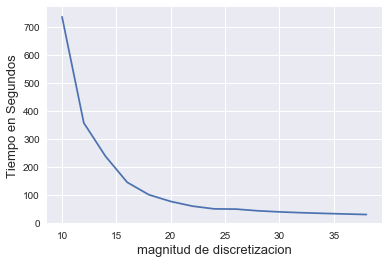

In [279]:
data = []

with open("resultado_tiempos_gauss.txt") as f:
  for line in f:
     parsed_line = line.split(", ")
     data.append(float(parsed_line[1]))
     print int(parsed_line[0])
values = data

values = np.array(values)
plt.xlabel('magnitud de discretizacion', fontsize=13)
plt.ylabel('Tiempo en Segundos', fontsize=13)
plt.plot(rango, values)
values


0
1


KeyboardInterrupt: 

In [285]:
call(["../../src/main","-i", "../../data/tomo2.csv","-o", "output/iter_34_output.csv", "-d", str(34),"-pixel 1", "--time", "--iterative"])


0

In [280]:
call(['rm',"time_mesurements.txt"])
for i in rango:
    for _ in range(1):
        call(["../../src/main","-i", "../../data/tomo2.csv","-o", "output/iter_{}_output.csv".format(i), "-d", str(i),"-pixel 1", "--time", "--iterative"])
    print i
call(["cp", "time_mesurements.txt", "resultado_tiempos_iter.txt"])

10
12
14
16
18
20
22
24
26
28
30
32
34
36
38


0

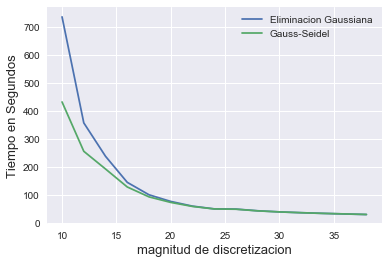

In [281]:
data_iter = []

with open("resultado_tiempos_iter.txt") as f:
  for line in f:
     parsed_line = line.split(", ")
     data_iter.append(float(parsed_line[1]))

values_iter = data_iter
values_iter = np.array(values_iter)
plt.plot(rango, values, label="Eliminacion Gaussiana")
plt.plot(rango, values_iter, label="Gauss-Seidel")
plt.xlabel('magnitud de discretizacion', fontsize=13)
plt.ylabel('Tiempo en Segundos', fontsize=13)
plt.legend()
plt.show()


In [47]:
original = np.genfromtxt("../../data/tomo.csv", delimiter=',').ravel()
original.shape

(10000,)

In [286]:

path_imgs_eg = ["output/eg_{}_output.csv".format(i) for i in rango]
path_imgs_iter = ["output/iter_{}_output.csv".format(i) for i in rango]
path_orig = ["csvs/original_{}.csv".format(i) for i in rango]

mserrors_eg = []
mserrors_iter = []
ms_index = []
i=0
for path, orig in zip(path_imgs_eg, path_orig):
    try:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        original = np.genfromtxt(orig, delimiter=',').ravel()
        mse = mean_squared_error(original, reconstructed)
        mserrors_eg.append(mse)
        ms_index.append(rango[i])
    except Exception as e:
        print e
        print "{} failed".format(path)
    i+=1
    
for path, orig in zip(path_imgs_iter, path_orig):
    try:
        reconstructed = np.genfromtxt(path, delimiter=',').ravel()
        original = np.genfromtxt(orig, delimiter=',').ravel()
        mse = mean_squared_error(original, reconstructed)
        mserrors_iter.append(mse)
    except Exception as e:
        print e
        print "{} failed".format(path)
        
mserrors_eg, mserrors_iter, ms_index


([8265.993388429752,
  8140.808601134216,
  7825.25375,
  9031.201632653061,
  8700.236212278876,
  8419.963010204081,
  7591.1392,
  7060.50472589792,
  7676.31611570248,
  6062.315,
  5640.072022160665,
  6358.586419753086,
  5949.754325259516,
  5774.796875,
  5548.808888888889],
 [7092.260826446281,
  7494.559073724007,
  8036.50375,
  7964.096326530612,
  8583.644120707597,
  8790.5625,
  6526.0832,
  6758.863894139887,
  7349.2768595041325,
  6089.0275,
  5742.869806094182,
  5885.271604938272,
  9355.024221453286,
  5842.75,
  6002.457777777778],
 [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

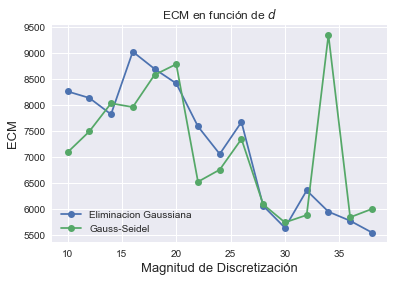

In [287]:
plt.plot(ms_index, mserrors_eg, marker='o',label="Eliminacion Gaussiana")
plt.plot(ms_index, mserrors_iter, marker='o',label="Gauss-Seidel")
plt.xlabel(u"Magnitud de Discretización", fontsize=13)
plt.ylabel(u"ECM", fontsize=13)
plt.title(u"ECM en función de $d$")
plt.legend()
plt.show()

# Test por partes

In [214]:
call(["rm", "tiempo-partes.txt"])
for i in range(10):
    call(["../../src/main","-i", "../../data/tomo.csv","-o", "output.csv", "-d", "10","-pixel 1", "--time"])
    print i
call(["cp", "tiempo-partes.txt", "resultado_tiempos_partes.txt"])

0
1
2
3
4
5
6
7
8
9


0

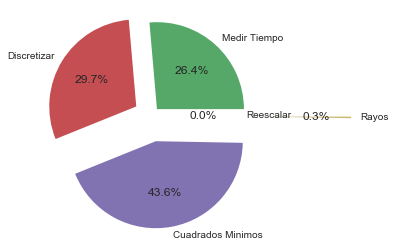

In [215]:
parts = {"Rayos":0,"Medir Tiempo":0,"Discretizar":0,"Cuadrados Minimos":0,"Reescalar":0}
with open("resultado_tiempos_partes.txt") as f:
    for line in f:
        parsed_line = line.split(", ")
        parts["Rayos"] += float(parsed_line[0])/ 10
        parts["Medir Tiempo"] += float(parsed_line[1])/ 10
        parts["Discretizar"] += float(parsed_line[2])/ 10
        parts["Cuadrados Minimos"] += float(parsed_line[3])/ 10
        parts["Reescalar"] += float(parsed_line[4])/ 10

fig = plt.figure()
ax = fig.gca()
ax.pie(parts.values(), labels=parts.keys(),explode=[0,0.1,0.2,0.3,1.3],autopct='%1.1f%%')
ax.set_aspect("equal")
plt.show()